# Güzide Nur Demir
# 215150432
# ASSIGNMENT 2


In [37]:
import nsfg
import thinkstats2
import thinkplot


In [2]:
resp=nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [12]:
school=resp[resp["hieduc"]<10]
university= resp[resp["hieduc"] > 10]


In [35]:
school[["agemomb1", "age_r", "agescrn", "cmbirth", "numrace"]].head()

,agemomb1,age_r,agescrn,cmbirth,numrace
0,2,27,27,902,1
2,4,43,43,708,1
3,3,15,15,1042,1
4,3,20,20,991,1
5,4,42,42,727,1


In [38]:


cdf_uni = thinkstats2.Cdf(university["hieduc"])
cdf_schl = thinkstats2.Cdf(school["hieduc"])


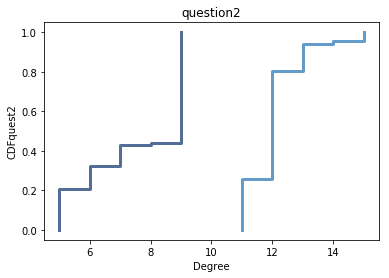

In [39]:

thinkplot.Cdf(cdf_schl, label='< collage/university')
thinkplot.Cdf(cdf_uni, label='>= collage/university')
thinkplot.Config(title="question2", xlabel='Degree', ylabel='CDFquest2')

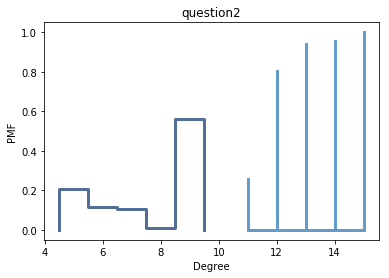

In [40]:
pmf_schl = thinkstats2.Pmf(schl["hieduc"])
pmf_uni = thinkstats2.Pmf(uni["hieduc"])

thinkplot.Pmf(pmf_schl, label='< collage/university')
thinkplot.Pmf(cdf_uni, label='>= collage/university')
thinkplot.Config(title="question2", xlabel='Degree', ylabel='PMF')

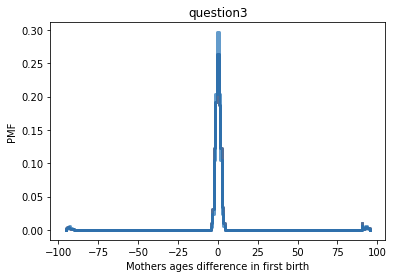

In [41]:
schl_differnce = school.agemomb1.diff()
uni_difference = university.agemomb1.diff()

thinkplot.Pmf(thinkstats2.Pmf(schl_differnce), label='< collage/university')
thinkplot.Pmf(thinkstats2.Pmf(uni_difference), label='>= collage/university')
thinkplot.Config(title="question3", xlabel='Mothers ages difference in terms of first birth', ylabel='PMF')

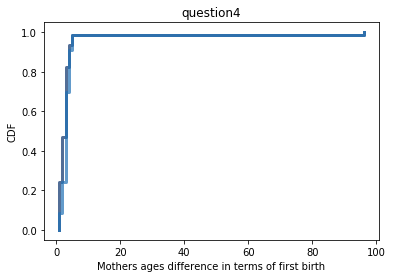

In [45]:
thinkplot.Cdf(thinkstats2.Cdf(school["agemomb1"]), label='< collage/university')
thinkplot.Cdf(thinkstats2.Cdf(university["agemomb1"]), label='>= collage/university')
thinkplot.Config(title="question4", xlabel='Mothers ages difference in terms of first birth', ylabel='CDF', loc='lower_right')

In [22]:
pmf = thinkstats2.Pmf(resp["agemomb1"])
probabilty = 0
for i in pmf:
    if i < 18:
        probabilty+=pmf[i]
        
print("Mothers probabilities in their first birth at less than 18 years old: {p}".format(p=probabilty))

Mothers probabilities in their first birth at less than 18 years old: 0.9865236163810023


In [23]:
pdf = thinkstats2.NormalPdf(resp.agemomb1.mean(), resp.agemomb1.std())
percntl = 0
for i in resp[resp["agemomb1"] >= 18].agemomb1:
    percntl += pdf.Density(i)

print("mothers percintile in 18 and older years old: {p}".format(p=percntl))

mothers percintile in 18 and older years old: 7.115042200548149e-16


In [43]:
distrbution = resp[["finalwgt", "rostscrn"]]
distrbution.head()

,finalwgt,rostscrn
0,5556.717241,5
1,4744.191350,1
2,4744.191350,1
3,5923.977368,4
4,7229.128072,4


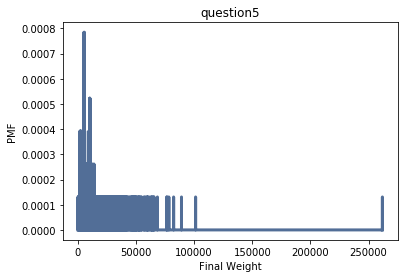

In [49]:
pmf_dstrbtn = thinkstats2.Pmf(distrbution["finalwgt"])
thinkplot.Pmf(pmf_dstrbtn, label='Participation')
thinkplot.Config(title="question5",xlabel='Final Weight', ylabel='PMF')

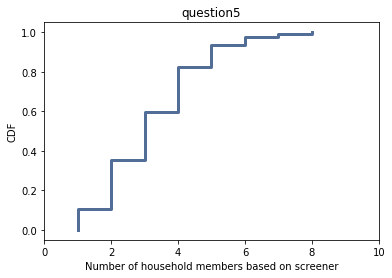

In [51]:
cdf_distrbtn = thinkstats2.Cdf(distrbution["rostscrn"])
thinkplot.Cdf(cdf_distrbtn, label='Participation')
thinkplot.Config(title="question5",xlabel='Number of household members based on screener', ylabel='CDF', xlim=[0, 10])